Importar datos

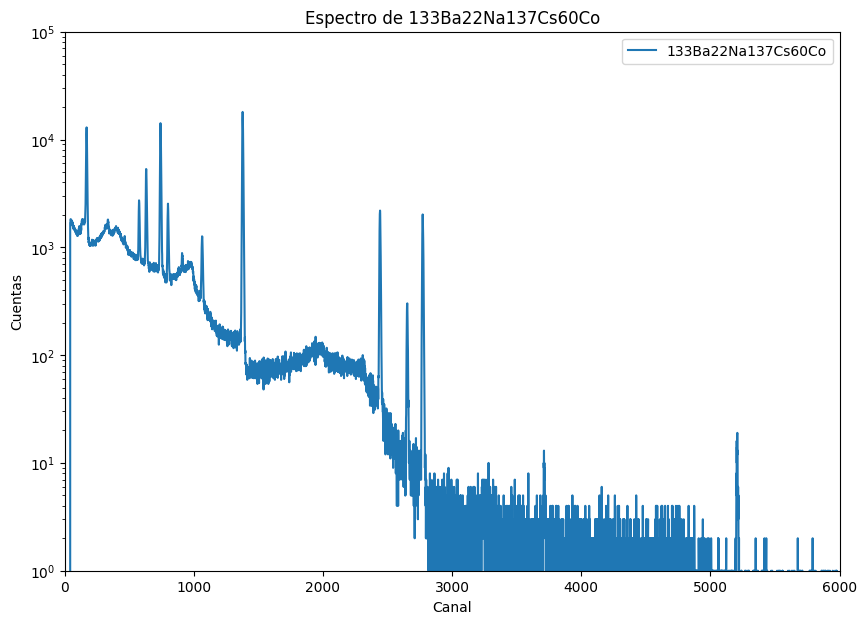

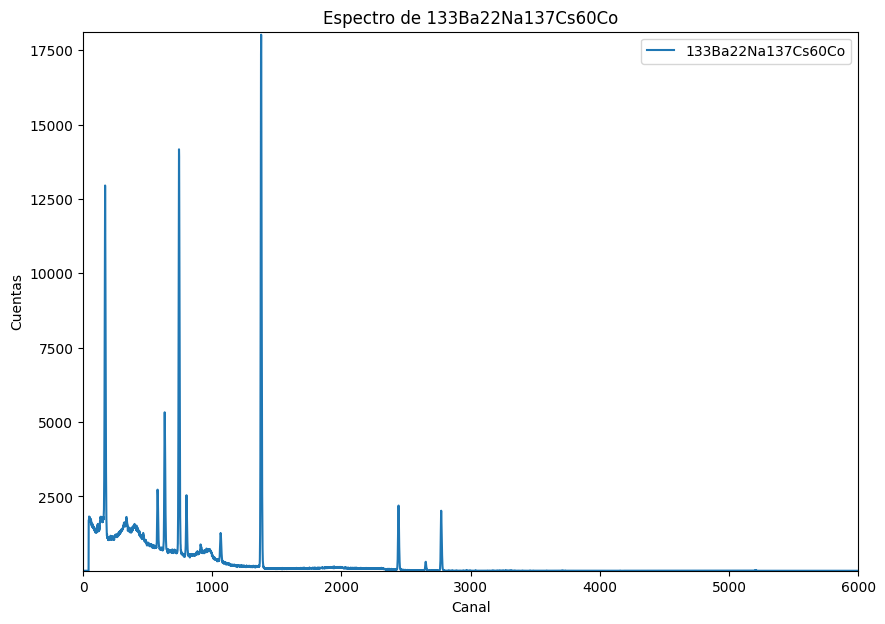

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# datos de calibración
# data_cal = np.loadtxt('files/calibracion.txt')
# importar datos csv con encabezados

data_cal = np.genfromtxt('2021-11-15_cal_133Ba22Na137Cs60Co_600s_1.csv', delimiter=',', skip_header=1)
canales = data_cal[:,0]
cuentas = data_cal[:,1]
fuente = '133Ba22Na137Cs60Co'

# La fuente de calibración es Ba-133, Na-22, Cs-137 y Co-60
def plotear_espectro(canales, cuentas, fuente, xlim=None, logplot=True):
    plt.figure(figsize=(10, 7))
    plt.plot(canales, cuentas, label=fuente)
    plt.xlabel('Canal')
    plt.ylabel('Cuentas')
    plt.title(f'Espectro de {fuente}')
    if logplot:
        plt.yscale('log')
        plt.ylim(1, 10**(np.ceil(np.log10(max(cuentas)))))
    else:
        plt.ylim(1, max(cuentas)+100)
    if xlim is not None:
        plt.xlim(0, xlim)
    else:
        plt.xlim(0, max(canales))
    plt.legend()
    plt.show()

plotear_espectro(canales, cuentas, fuente, xlim=6000)
plotear_espectro(canales, cuentas, fuente, xlim=6000, logplot=False)

In [18]:
# lista de energías de los picos de calibración

values = {'22Na_1': 1274.537,
             '60Co_1': 1173.228,
             '60Co_2': 1332.490,
             '137Cs_1': 661.657,
             '137Cs_alfa':32.06,
             '133Ba_1': 53.1625,
             '133Ba_2': 79.6139,
             '133Ba_3': 80.9971,
             '133Ba_4': 160.6109,
             '133Ba_5': 223.2373,
             '133Ba_6': 276.3997,
             '133Ba_7': 302.8510,
             '133Ba_8': 356.0134,
             '133Ba_9': 383.8480}


values_sorted = sorted(values.items(), key=lambda x: x[1])

p_energia = [(key, value) for key, value in values_sorted if key not in ['137Cs_alfa', '137Cs_beta']]

import pandas as pd
f_calibracion = pd.DataFrame(p_energia, columns=['Fuente', 'Energía (keV)'])
f_calibracion


,Fuente,Energía (keV)
0,133Ba_1,53.1625
1,133Ba_2,79.6139
2,133Ba_3,80.9971
3,133Ba_4,160.6109
4,133Ba_5,223.2373
5,133Ba_6,276.3997
6,133Ba_7,302.8510
7,133Ba_8,356.0134
8,133Ba_9,383.8480
9,137Cs_1,661.6570


In [28]:
#Funcion para plotear un pico de interés
def plotear_pico(canales, cuentas, fuente, canal, anchocanal=20):
    plt.figure(figsize=(10, 7))
    plt.plot(canales, cuentas, label=fuente)
    plt.xlabel('Canal')
    plt.ylabel('Cuentas')
    plt.title(f'Espectro de {fuente}')
    plt.xlim(canal-anchocanal, canal+anchocanal)
    plt.legend()
    plt.show()

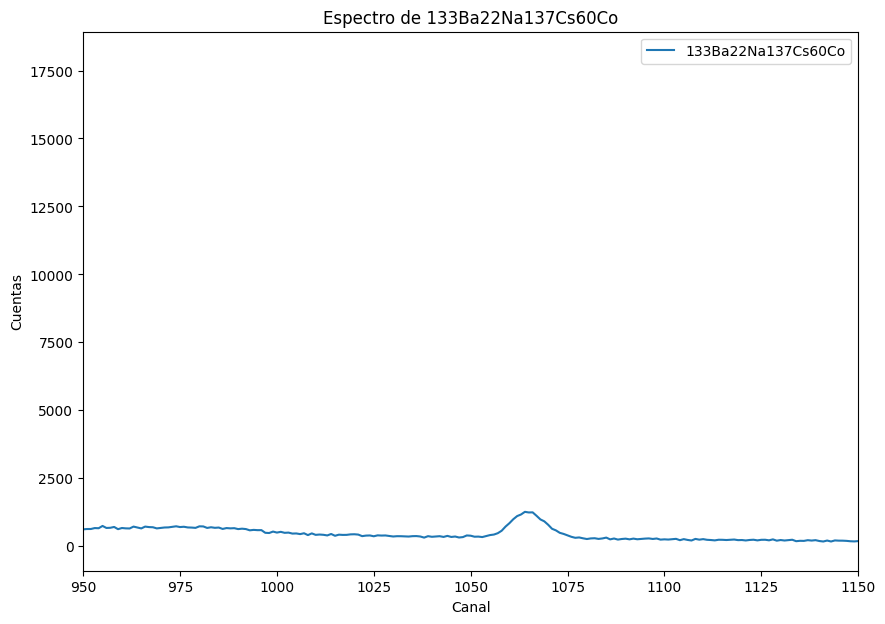

In [38]:
# Lista de canales de los picos de calibración

plotear_pico(canales, cuentas, fuente, 1050, anchocanal=100)

In [ ]:
p_canal_estimado = [170, 575, 630, 745, 800, 1065]